In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
cap =cv2.VideoCapture('vtest.avi')

In [31]:
frame_width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(frame_width)
print(frame_height)

768
576


In [32]:
fourcc=cv2.VideoWriter_fourcc('X','V','I','D')
out=cv2.VideoWriter('output.avi',fourcc,30,(1280,720))

In [33]:
ret,frame1=cap.read()
ret,frame2=cap.read()
frame1.shape

(576, 768, 3)

#### The cv2.absdiff() 
function is designed to compute the absolute difference between corresponding elements of two arrays or images. It operates on each pixel individually and returns a new array or image that contains the absolute differences.

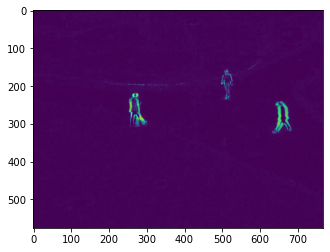

In [34]:
while cap.isOpened():
    diff=cv2.absdiff(frame1,frame2)
    gray=cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
    break
plt.imshow(gray)

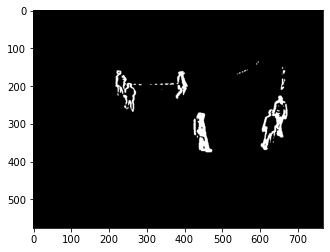

In [40]:
while cap.isOpened():
    diff=cv2.absdiff(frame1,frame2)
    gray=cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=10) 
    break
plt.imshow(thresh,cmap='gray')

In [36]:
while cap.isOpened():
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    
    if not ret:
        break
        
    diff=cv2.absdiff(frame1,frame2)
    gray=cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=10)    #expand the thresh pixel to be clear
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x, y, w, h) =  cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 900:
            continue

        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20),cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 3)
        
    image = cv2.resize(frame1, (1280,720))

    out.write(image)
    cv2.imshow("feed", frame1)

    frame1 = frame2

    ret, frame2 = cap.read()#read

    

    if cv2.waitKey(40) == 27:
        break

In [37]:
cv2.destroyAllWindows()#close window

cap.release()#close camera

out.release()#close when write